# Table of Contents

* [Chapter 1](#Import) Import
* [Chapter 2](#Gathering) Gathering
* [Chapter 3](#Assessing) Assessing
* [Chapter 4](#Cleaning) Cleaning
* [Chapter 5](#Storing) Storing
* [Chapter 6](#Analyzing) Analyzing

# Importing needed libs
<a class="anchor" id="chapter1"></a>

In [5]:
# tweepy package installed as it is not on my local machine 
##!pip install tweepy

In [6]:
# importing all required lib for our project
import pandas as pd 
import numpy as np 
import tweepy
import requests
import re
import json 
import matplotlib.pyplot as plt
import datetime
import os 
import seaborn as sns 
from scipy import stats 
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

# Gathering Data 
<a class="anchor" id="chapter2"></a>

## Read archive csv file 

In [7]:
#gather first data
archive_df = pd.read_csv('twitter-archive-enhanced.csv')
# check that gathering done successfully
archive_df.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


## Gather Images data by downloading it
<a class="anchor" id="section_1_2"></a>


In [8]:
# Make directory for new data
folder_name = 'image_predicitions_data'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
# get the data from the given link 
url ='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open (os.path.join (folder_name,url.split('/')[-1]),mode = 'wb') as file:
    file.write(response.content)

In [9]:
# note as i found it is only one file i copy it to my directory manually  
# now we read the file to the new df (gather second data)
image_predictions_df = pd.read_csv('image-predictions.tsv',sep = ('\t'))
## check that gathering done successfully
image_predictions_df.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


## API_Data
<a class="anchor" id="section_1_3"></a>

I  got the twitter developer account so the next is just a code example but not running, I used  the file
('tweet_json_2.txt') which i put in the folder and which i got using this code, also the cell is defined as raw to 
not excute when use run all in Jupyter notebook3

In [10]:
#test the file and the extracting from the file
with open('tweet_json_2.txt', 'r') as file:
    for line in file:
        tweet = json.loads(line)
        print((tweet['id']))
        break

892420643555336193


In [11]:
# buliding the final data frame and testing the gathering done correctly using id,retweet count, fav count 
#and also user followers count
df_list = []

with open('tweet_json_2.txt', 'r') as file:
    for line in file:
        tweet = json.loads(line)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        fav_count = tweet['favorite_count']
        user_count = tweet['user']['followers_count']
        df_list.append({'tweet_id':tweet_id,
                       'retweet_count': retweet_count,
                       'favorite_count': fav_count,
                       'user_count': user_count})
        
api_df= pd.DataFrame(df_list)
api_df.head()

,tweet_id,retweet_count,favorite_count,user_count
0,892420643555336193,7445,35283,8931092
1,892177421306343426,5531,30525,8931092
2,891815181378084864,3653,22957,8931092
3,891689557279858688,7615,38569,8931092
4,891327558926688256,8204,36837,8931092


# Assessing 
<a class="anchor" id="chapter3"></a>

## Assesing Functions 

In [12]:
# save api_df and image_predictions_df to assessing visually using Google sheets
# we already have archive_df in csv format 
api_df.to_csv('api_data_final.csv',index = False)
image_predictions_df.to_csv('image_predictions_df.csv',index = False)

In [13]:
# a quick look for the data 
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [14]:
archive_df.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1090,737678689543020544,NaN,NaN,2016-05-31 16:14:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Pls stop sending in non-can...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/737678689...,11,10,None,None,None,None,None
577,800855607700029440,NaN,NaN,2016-11-22 00:17:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Lin_Manuel: 11/10 would recommend. https:/...,8.008540e+17,7.992370e+07,2016-11-22 00:10:52 +0000,https://twitter.com/littlewiewel/status/800852...,11,10,None,None,None,None,None
2340,666099513787052032,NaN,NaN,2015-11-16 03:44:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Can stand on stump for what seems like a while...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666099513...,8,10,None,None,None,None,None
2272,667491009379606528,NaN,NaN,2015-11-19 23:53:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Two dogs in this one. Both are rare Jujitsu Py...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667491009...,7,10,None,None,None,None,None
2205,668633411083464705,NaN,NaN,2015-11-23 03:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Churlie. He likes bagels. 10/10 https:...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668633411...,10,10,Churlie,None,None,None,None
950,752173152931807232,NaN,NaN,2016-07-10 16:10:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Brody. He's a lifeguard. Always prepar...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/752173152...,12,10,Brody,None,None,None,None
2132,670079681849372674,NaN,NaN,2015-11-27 03:20:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Fabio. He's a wonderful pup. Can't stay a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670079681...,10,10,Fabio,None,None,None,None
1866,675349384339542016,6.749998e+17,4.196984e+09,2015-12-11 16:20:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Yea I lied. Here's more. All 13/10 https://t.c...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675349384...,13,10,None,None,None,None,None
552,804413760345620481,NaN,NaN,2016-12-01 19:56:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Rusty. He's going D1 fo...,7.848260e+17,4.196984e+09,2016-10-08 18:41:19 +0000,https://twitter.com/dog_rates/status/784826020...,13,10,Rusty,None,None,None,None
1938,673906403526995968,NaN,NaN,2015-12-07 16:46:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys I'm getting real tired of this. We only r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673906403...,3,10,None,None,None,None,None


In [15]:
print(archive_df['doggo'].value_counts())
print('____________________')
print(archive_df['puppo'].value_counts())
print('____________________')
print(archive_df['pupper'].value_counts())
print('____________________')
print(archive_df['floofer'].value_counts())

None     2259
doggo      97
Name: doggo, dtype: int64
____________________
None     2326
puppo      30
Name: puppo, dtype: int64
____________________
None      2099
pupper     257
Name: pupper, dtype: int64
____________________
None       2346
floofer      10
Name: floofer, dtype: int64


In [16]:
print(archive_df['name'].value_counts())
print(archive_df['rating_numerator'].value_counts())

None        745
a            55
Charlie      12
Oliver       11
Lucy         11
           ... 
Dwight        1
Hector        1
Rodman        1
Finnegus      1
Jameson       1
Name: name, Length: 957, dtype: int64
12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64


In [17]:
# a quick look for api data we can see tweets are deleted or accounts closed 
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2330 entries, 0 to 2329
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2330 non-null   int64
 1   retweet_count   2330 non-null   int64
 2   favorite_count  2330 non-null   int64
 3   user_count      2330 non-null   int64
dtypes: int64(4)
memory usage: 72.9 KB


In [18]:
# a quick look for the data 
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


## Assessing Insights 


### First Quality

- 1) `archive_df` almost all data  missing data in retweets columns and also the report asked to delet the retweets (in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp)

- 2) `archive_df` 59  missed Data in (expanded_urls) 

- 3) `archive_df` name column have 745 rows with None data 

- 4) `archive_df` a lot of None rows in (doggo, floofer,pupper,puppo) columns 

- 5) each data frame has various number of tweets (2356,2330,2075) 

- 6) `archive_df`rating_denominator and is rating_numerator have many unaccurate data like very high (1776,940,170,...)

- 7) `archive_df` name column have many wrong names(a,an,all..)

- 8) `archive_df` timestamp is object format not date time

### Second Tidiness 
- 1) `archive_df` the four coloumns of (doggo, floofer,pupper,puppo) should be for one coloum only called (stage) with categorical data from (doggo, floofer,pupper,puppo), so A single observational unit is stored in multiple tables.

- 2) `api_df`can be merged with the `archive_df` table as they are one unit of obeservations 

- 3) The `image_prediction` table,the column headers don't look understandable and well structured.

# Cleaning 
<a class="anchor" id="chapter4"></a>
## create clean data frames

In [19]:
archive_clean = archive_df.copy()

In [20]:
api_clean = api_df.copy()

In [21]:
image_clean = image_predictions_df.copy()

In [22]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

## Using Differenet functions to clean

### fix problem 1 & 5 by matching between data frames 
also delet the replies and retweets 

In [23]:
# Define:
#problem 5 each data frame has various number of tweets (2356,2330,2075)
#I will solve the problem by checking each data with the other so
# first check the tweets that doesn't have images and delet them 
#code :
tweets_with_images = list(image_clean.tweet_id.unique())
len(tweets_with_images) == archive_clean.tweet_id.isin(tweets_with_images).sum()


True

In [24]:
#now removing the tweets that doesn't have image
archive_clean = archive_clean[archive_clean.tweet_id.isin(tweets_with_images)]
#test 
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2075 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2075 non-null   object 
 4   source                      2075 non-null   object 
 5   text                        2075 non-null   object 
 6   retweeted_status_id         81 non-null     float64
 7   retweeted_status_user_id    81 non-null     float64
 8   retweeted_status_timestamp  81 non-null     object 
 9   expanded_urls               2075 non-null   object 
 10  rating_numerator            2075 non-null   int64  
 11  rating_denominator          2075 non-null   int64  
 12  name                        2075 non-null   object 
 13  doggo                       2075 

In [25]:
# Define:
#problem 5 now we delet retweets and replies from our tables
# first we identify the retweets and replies 
#code:
retweets_en = archive_clean.retweeted_status_id.notnull()
replies_en= archive_clean.in_reply_to_status_id.notnull()
archive_clean[retweets_en].shape[0]
archive_clean[replies_en].shape[0]
archive_clean = archive_clean[~retweets_en]
archive_clean = archive_clean[~replies_en]
#for test 
print(archive_clean.info())

#now delet the same tweets from image table 
# check first
np.logical_not(image_clean.tweet_id.isin(list(archive_clean.tweet_id))).value_counts()
# we found 104 tweets are not matching which they are replies and retweets

image_clean = image_clean[~np.logical_not(image_clean.tweet_id.isin(list(archive_clean.tweet_id)))]
# for test
print(image_clean.info())
#test 
np.logical_not(image_clean.tweet_id.isin(list(archive_clean.tweet_id))).value_counts()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1971 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   1971 non-null   object 
 4   source                      1971 non-null   object 
 5   text                        1971 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               1971 non-null   object 
 10  rating_numerator            1971 non-null   int64  
 11  rating_denominator          1971 non-null   int64  
 12  name                        1971 non-null   object 
 13  doggo                       1971 

False    1971
Name: tweet_id, dtype: int64

In [26]:
# Define: 
#problem 1 quality 
# finally we will drop all retweets columns from our data frame after using it to delet all tweets from image table 
#code:
archive_clean.drop(['in_reply_to_status_id',
                    'in_reply_to_user_id',
                    'retweeted_status_id',
                    'retweeted_status_user_id','retweeted_status_timestamp'],axis = 1, inplace = True)
# test:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            1971 non-null   int64 
 1   timestamp           1971 non-null   object
 2   source              1971 non-null   object
 3   text                1971 non-null   object
 4   expanded_urls       1971 non-null   object
 5   rating_numerator    1971 non-null   int64 
 6   rating_denominator  1971 non-null   int64 
 7   name                1971 non-null   object
 8   doggo               1971 non-null   object
 9   floofer             1971 non-null   object
 10  pupper              1971 non-null   object
 11  puppo               1971 non-null   object
dtypes: int64(3), object(9)
memory usage: 200.2+ KB


### Problem 2 

In [27]:
# Define:
#problem 2 quality, `archive_df` 59  missed Data in (expanded_urls) ,as the number is not large 
# and also we can't fill this data using the data we have, we will drop the un known values using dropna method
#but when we was deleting the tweets without images,retweets, and replies this missing data also dropped 
# test:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            1971 non-null   int64 
 1   timestamp           1971 non-null   object
 2   source              1971 non-null   object
 3   text                1971 non-null   object
 4   expanded_urls       1971 non-null   object
 5   rating_numerator    1971 non-null   int64 
 6   rating_denominator  1971 non-null   int64 
 7   name                1971 non-null   object
 8   doggo               1971 non-null   object
 9   floofer             1971 non-null   object
 10  pupper              1971 non-null   object
 11  puppo               1971 non-null   object
dtypes: int64(3), object(9)
memory usage: 200.2+ KB


### fixing problem 3 & 7 using if statments and replace with pattern

In [28]:
# Define: 
#problem 3,7 `archive_df` name column have 745 rows with None data and `archive_df` name column have many wrong names(a,an,all..),
# this is because extracting names did wrong and also it is better to keep none as null to further use
# we will assign a new pattern to get the names and then if  we can't find the name we  replace them names with null
#Code:
pattern_2 = re.compile(r'(?:name(?:d)?)\s{1}(?:is\s)?([A-Za-z]+)')
for index, row in archive_clean.iterrows():  
    try:
        if row['name'] == "a":
            c_name = re.findall(pattern_2, row['text'])[0]
            archive_clean.loc[index,'name'] = archive_clean.loc[index,'name'].replace('a', c_name)
        elif row['name'] == 'an':
            c_name = re.findall(pattern_2, row['text'])[0]
            archive_clean.loc[index,'name'] = archive_clean.loc[index,'name'].replace('an', c_name)
        elif row['name'] == 'None':
            c_name = re.findall(pattern_2, row['text'])[0]
            archive_clean.loc[index,'name'] = archive_clean.loc[index,'name'].replace('None', c_name)
    except IndexError:
        archive_clean.loc[index,'name'] = np.nan

# test:
archive_clean.name.value_counts(dropna = False)

NaN        556
Charlie     11
Cooper      10
Oliver      10
Lucy        10
          ... 
Fizz         1
Jersey       1
Binky        1
Ester        1
Adele        1
Name: name, Length: 957, dtype: int64

### fixing Problem 4 and 1 tidiness using replace 

In [29]:
#Define:
#problem 4 quality & 1 tidiness we will tranfer all none to ''
# also we will combin all coloumns in one coloum called dog_breed then drop the old 
# columns and leave the new one with modified names, at the end  we will replace all '' with nan value 
#code:
archive_clean['doggo'].replace('None','',inplace= True)
archive_clean['floofer'].replace('None','',inplace= True)
archive_clean['pupper'].replace('None','',inplace= True)
archive_clean['puppo'].replace('None','',inplace= True)


archive_clean['dog_breed'] =archive_clean['doggo'] + archive_clean['floofer']+ archive_clean['pupper']+ archive_clean['puppo']
print(archive_clean['dog_breed'].value_counts(dropna = False))
#drop old columns 
archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'],axis =1 , inplace =True)
#modify the names and replace ''with nan value
archive_clean.loc[archive_clean.dog_breed == 'doggopupper', 'dog_breed'] = 'doggo-pupper'
archive_clean.loc[archive_clean.dog_breed == 'doggofloofer', 'dog_breed'] = 'doggo-floofer'
archive_clean.loc[archive_clean.dog_breed == 'doggopuppo', 'dog_breed'] = 'doggo-puppo'

archive_clean.dog_breed =archive_clean.dog_breed.replace('' ,np.nan)

#test:
print(archive_clean.info())
archive_clean.dog_breed.value_counts()


                1668
pupper           201
doggo             63
puppo             22
doggopupper        8
floofer            7
doggopuppo         1
doggofloofer       1
Name: dog_breed, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            1971 non-null   int64 
 1   timestamp           1971 non-null   object
 2   source              1971 non-null   object
 3   text                1971 non-null   object
 4   expanded_urls       1971 non-null   object
 5   rating_numerator    1971 non-null   int64 
 6   rating_denominator  1971 non-null   int64 
 7   name                1415 non-null   object
 8   dog_breed           303 non-null    object
dtypes: int64(3), object(6)
memory usage: 234.0+ KB
None


pupper           201
doggo             63
puppo             22
doggo-pupper       8
floofer            7
doggo-puppo        1
doggo-floofer      1
Name: dog_breed, dtype: int64

### Problem 6 

In [30]:
#Define:
#problem 6 as we find when pepole rate high rates, usually there are a lot of dogs
# so we will divide the rate with dog_counts and replace it
#code:
dogs_count = archive_clean.rating_numerator[archive_clean.rating_numerator >= 20]/10
archive_clean.loc[archive_clean.rating_numerator >= 20, ['rating_numerator','rating_denominator']] = [archive_clean.rating_numerator
                                                                                                         [archive_clean.rating_numerator >= 20]
                                                                                                         /dogs_count , 10]
#test:
archive_clean.rating_numerator.value_counts()

12.0    446
10.0    435
11.0    392
13.0    253
9.0     150
8.0      95
7.0      52
5.0      33
14.0     33
6.0      32
3.0      19
4.0      16
2.0       9
1.0       5
0.0       1
Name: rating_numerator, dtype: int64

### problem 2 tidiness using merge 

In [31]:
#Define:
#problem 2 tidiness `api_df`can be merged with the `archive_df` table as they are one unit of obeservations, we will merge both
# on tweet_id 
#code:
twitter_archive_master= pd.merge(archive_clean, api_clean, on='tweet_id')
#test
twitter_archive_master.info()
twitter_archive_master.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1963 entries, 0 to 1962
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1963 non-null   int64  
 1   timestamp           1963 non-null   object 
 2   source              1963 non-null   object 
 3   text                1963 non-null   object 
 4   expanded_urls       1963 non-null   object 
 5   rating_numerator    1963 non-null   float64
 6   rating_denominator  1963 non-null   int64  
 7   name                1408 non-null   object 
 8   dog_breed           301 non-null    object 
 9   retweet_count       1963 non-null   int64  
 10  favorite_count      1963 non-null   int64  
 11  user_count          1963 non-null   int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 199.4+ KB


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_breed,retweet_count,favorite_count,user_count
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,NaN,7445,35283,8931092
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,NaN,5531,30525,8931092
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,NaN,3653,22957,8931092
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,NaN,7615,38569,8931092
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,NaN,8204,36837,8931092
5,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10,NaN,NaN,2752,18577,8931092
6,890971913173991426,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10,Jax,NaN,1780,10798,8931092
7,890729181411237888,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13.0,10,NaN,NaN,16643,59438,8931092
8,890609185150312448,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13.0,10,Zoey,NaN,3801,25560,8931092
9,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14.0,10,Cassie,doggo,6452,29162,8931092


### Problem 8 timestamp

In [32]:
#define:
#problem 8 `archive_df` timestamp is object format not date time, we will change it using to_datetime function
#code:
twitter_archive_master['timestamp']=pd.to_datetime(twitter_archive_master['timestamp'])
#test
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1963 entries, 0 to 1962
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1963 non-null   int64              
 1   timestamp           1963 non-null   datetime64[ns, UTC]
 2   source              1963 non-null   object             
 3   text                1963 non-null   object             
 4   expanded_urls       1963 non-null   object             
 5   rating_numerator    1963 non-null   float64            
 6   rating_denominator  1963 non-null   int64              
 7   name                1408 non-null   object             
 8   dog_breed           301 non-null    object             
 9   retweet_count       1963 non-null   int64              
 10  favorite_count      1963 non-null   int64              
 11  user_count          1963 non-null   int64              
dtypes: datetime64[ns, UTC](1), float64

### problem 3 tidiness image table 

In [33]:
#define:
#problem 3 tidiness The `image_prediction` table,the column headers don't look understandable and well structured 
#first we will change the names of the columns and then we will try to combined the columns p1_dog to p3_dog and coffections
# to three columns using wide_to_long function 
#changing the names
#code:
new_cols = ['tweet_id', 'jpg_url', 'img_num', 
       'prediction_1', 'confidence_1', 'breed_1',
       'prediction_2', 'confidence_2', 'breed_2',
       'prediction_3', 'confidence_3', 'breed_3']
image_clean.columns = new_cols
# check 
print(image_clean.head(1))
#reduce the columns and reshaping the dataframe
image_final = pd.wide_to_long(image_clean, stubnames=['prediction', 'confidence', 'breed'], 
    i=['tweet_id', 'jpg_url', 'img_num'], j='prediction_level', sep="_").reset_index()

#test _take care that the data now is multiplied by 3 as we divided each prediction level
image_final.info()

             tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   

   img_num            prediction_1  confidence_1  breed_1 prediction_2  \
0        1  Welsh_springer_spaniel      0.465074     True       collie   

   confidence_2  breed_2       prediction_3  confidence_3  breed_3  
0      0.156665     True  Shetland_sheepdog      0.061428     True  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5913 entries, 0 to 5912
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tweet_id          5913 non-null   int64  
 1   jpg_url           5913 non-null   object 
 2   img_num           5913 non-null   int64  
 3   prediction_level  5913 non-null   int64  
 4   prediction        5913 non-null   object 
 5   confidence        5913 non-null   float64
 6   breed             5913 non-null   bool   
dtypes: bool(1), float64(1), int64(

# Storing the data
<a class="anchor" id="chapter5"></a>

In [34]:
#Merge all data in one file & storing it 
twitter_archive_master= pd.merge(twitter_archive_master, image_final, on='tweet_id')
twitter_archive_master.to_csv('twitter_archive_master.csv', index = False)

# Analyze the data 
<a class="anchor" id="chapter6"></a>

In [35]:
image_final.describe()

,tweet_id,img_num,prediction_level,confidence
count,5.913000e+03,5913.000000,5913.000000,5.913000e+03
mean,7.360418e+17,1.201928,2.000000,2.631027e-01
std,6.751667e+16,0.558926,0.816566,2.912164e-01
min,6.660209e+17,1.000000,1.000000,1.740170e-10
25%,6.758531e+17,1.000000,1.000000,5.079180e-02
50%,7.088343e+17,1.000000,2.000000,1.349670e-01
75%,7.881506e+17,1.000000,3.000000,3.796240e-01
max,8.924206e+17,4.000000,3.000000,1.000000e+00


In [36]:
twitter_archive_master.describe()

,tweet_id,rating_numerator,rating_denominator,retweet_count,favorite_count,user_count,img_num,prediction_level,confidence
count,5.889000e+03,5889.000000,5889.000000,5889.000000,5889.000000,5.889000e+03,5889.000000,5889.000000,5.889000e+03
mean,7.358414e+17,10.519103,10.002038,2390.354050,8118.611309,8.931107e+06,1.202241,2.000000,2.630508e-01
std,6.743783e+16,2.177504,0.290817,4270.922111,11936.295681,6.716568e+01,0.559644,0.816566,2.909735e-01
min,6.660209e+17,0.000000,2.000000,11.000000,69.000000,8.931092e+06,1.000000,1.000000,1.740170e-10
25%,6.758228e+17,10.000000,10.000000,531.000000,1739.000000,8.931097e+06,1.000000,1.000000,5.094240e-02
50%,7.087381e+17,11.000000,10.000000,1158.000000,3668.000000,8.931099e+06,1.000000,2.000000,1.350550e-01
75%,7.878106e+17,12.000000,10.000000,2730.000000,10158.000000,8.931104e+06,1.000000,3.000000,3.793650e-01
max,8.924206e+17,14.000000,20.000000,75112.000000,152008.000000,8.931743e+06,4.000000,3.000000,1.000000e+00


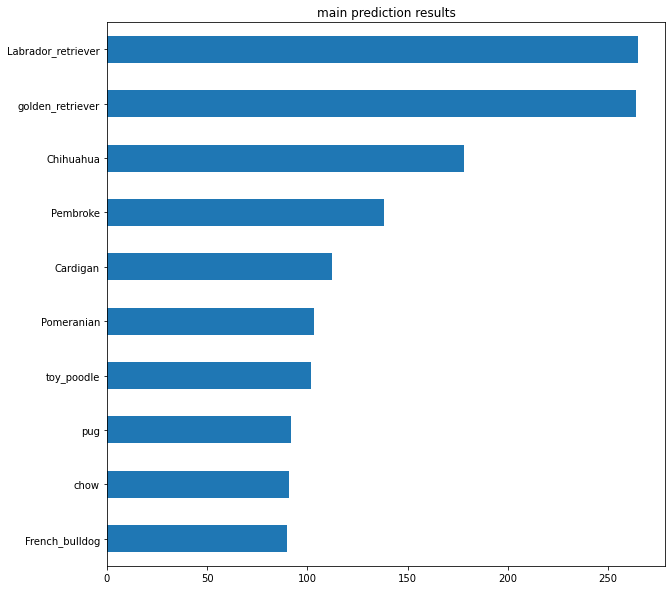

In [38]:
image_final.prediction.value_counts().head(10).sort_values(ascending=True).plot(
    kind='barh',title='main prediction results',figsize=(10,10));

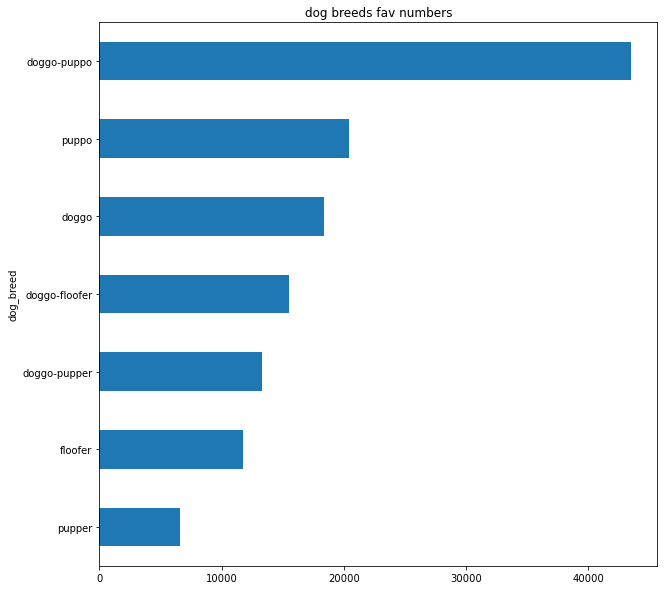

In [39]:
twitter_archive_master.groupby(['dog_breed']).favorite_count.mean().sort_values(ascending=False)[12::-1].plot(
    kind='barh',title ='dog breeds fav numbers',figsize =(10,10));

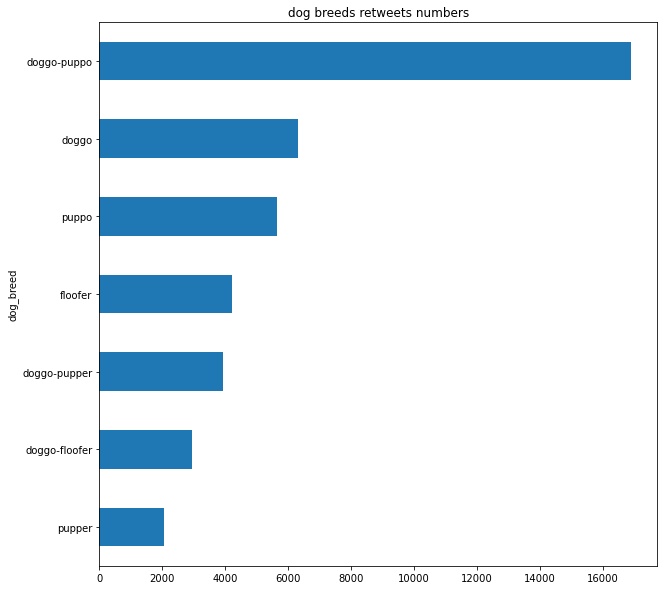

In [40]:
twitter_archive_master.groupby(['dog_breed']).retweet_count.mean().sort_values(ascending=False)[12::-1].plot(
    kind='barh',title ='dog breeds retweets numbers',figsize =(10,10));